In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


In [3]:
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'


In [6]:
#Checking number of spectrograms in each instrument folder

# Initialize dictionaries to store subfolder names and their corresponding spectrogram counts
subfolder_dict = {}
spectrogram_count_dict = {}

# Loop through all items in the directory
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = item_path
        
        # Count the number of spectrogram images in the subfolder
        spectrogram_count = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        spectrogram_count_dict[item] = spectrogram_count

# Print the subfolders and their corresponding spectrogram counts
for subfolder, count in spectrogram_count_dict.items():
    print(f"Subfolder '{subfolder}' contains {count} spectrogram images.")


Subfolder 'flute' contains 451 spectrogram images.
Subfolder 'guitar_acoustic' contains 637 spectrogram images.
Subfolder 'piano' contains 721 spectrogram images.
Subfolder 'trumpet' contains 577 spectrogram images.
Subfolder 'violin' contains 580 spectrogram images.


C:\Users\user\AppData\Local\Temp\ipykernel_35448\1466670906.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


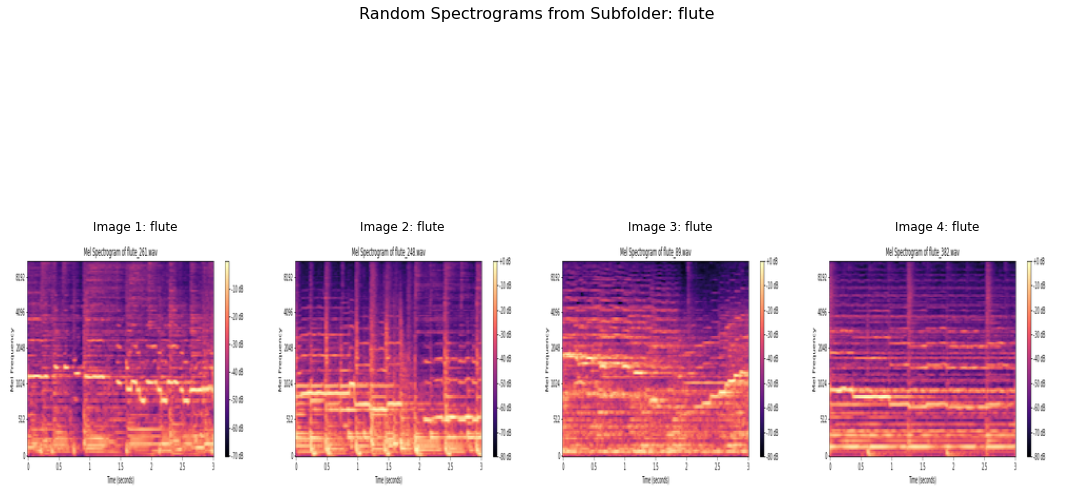

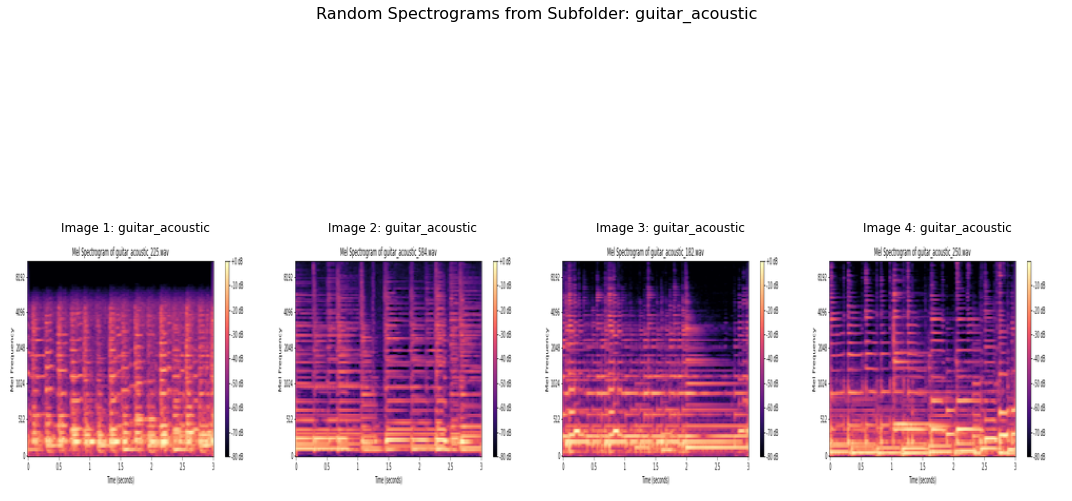

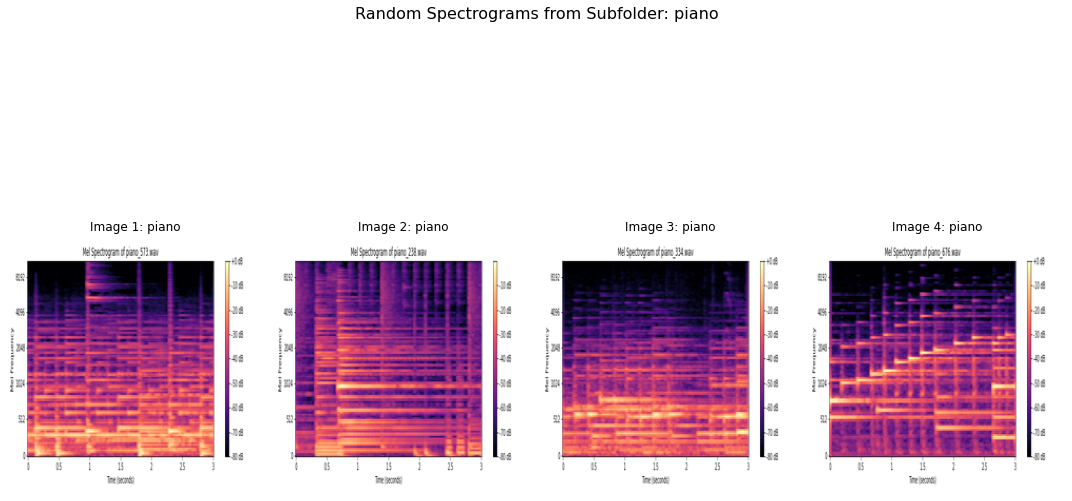

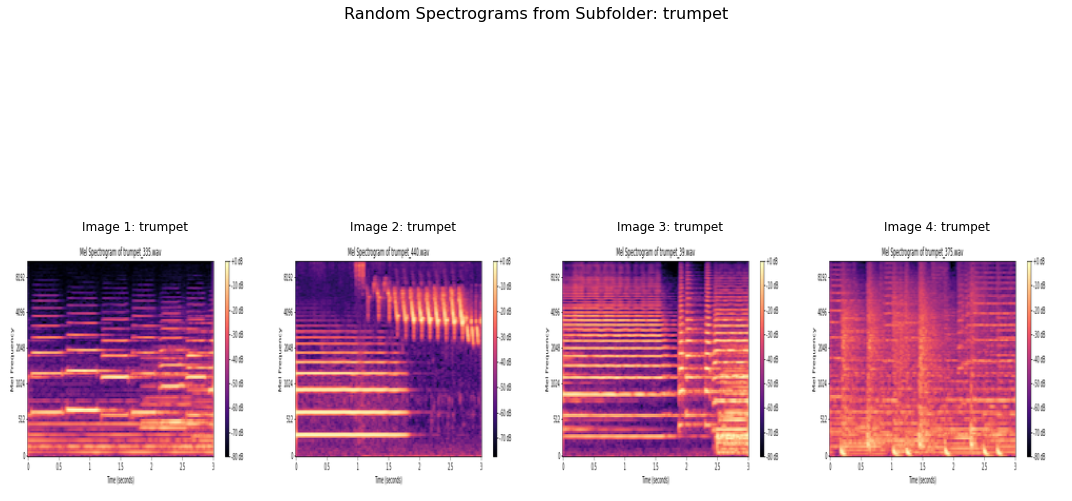

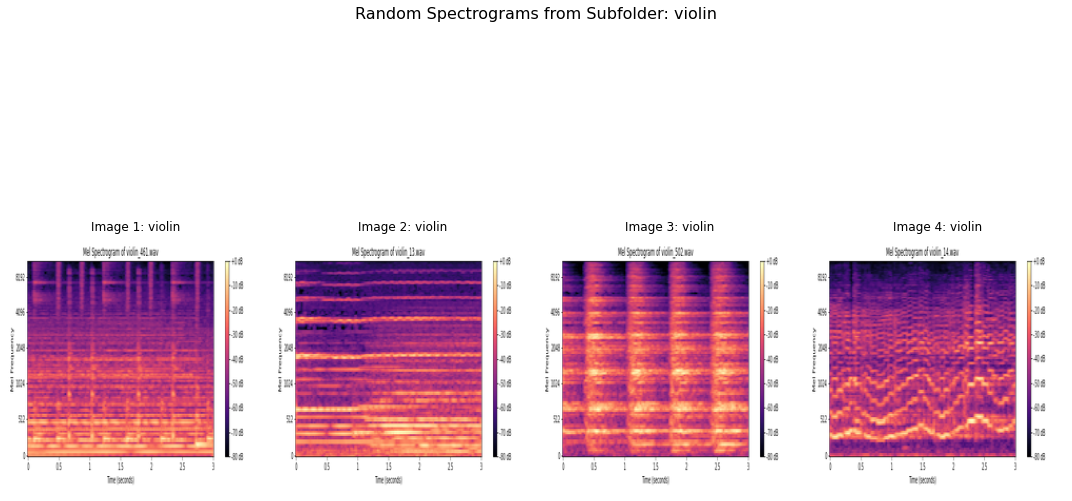

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Target size for resizing the images
target_size = (244, 244)

# Function to resize and rename the image using only the subfolder name
def resize_and_rename_image(file_path, class_name):
    # Open the image using PIL
    img = Image.open(file_path)
    
    # Resize the image to the target size
    img_resized = img.resize(target_size, Image.ANTIALIAS)
    
    # Get only the subfolder name without any additional text
    new_file_name = class_name + ".png"
    
    return img_resized, new_file_name

# Dictionary to store subfolder names and their corresponding image paths
subfolder_dict = {}

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = []
        class_name = item  # Get the subfolder name as the class name
        
        # Loop through all files in the subfolder
        for file_name in os.listdir(item_path):
            file_path = os.path.join(item_path, file_name)
            subfolder_dict[item].append(file_path)

# Function to randomly select 4 images from each subfolder and plot them
def plot_random_images(subfolder_dict):
    num_images_per_subfolder = 4
    
    for subfolder, file_paths in subfolder_dict.items():
        random_images = random.sample(file_paths, num_images_per_subfolder)
        
        plt.figure(figsize=(15, 10))
        plt.suptitle(f"Random Spectrograms from Subfolder: {subfolder}", fontsize=16)
        
        for i, image_path in enumerate(random_images, 1):
            img, new_file_name = resize_and_rename_image(image_path, subfolder)
            plt.subplot(1, num_images_per_subfolder, i)
            plt.imshow(img)
            plt.title(f"Image {i}: {subfolder}")
            plt.axis('off')
            plt.tight_layout()
        
        plt.show()

# Plot 4 random images from each subfolder along with their names
plot_random_images(subfolder_dict)


In [23]:
import os
import random
import shutil

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Number of images to randomly select from each subfolder
num_images_per_subfolder = 400

# Function to randomly select and copy images from each subfolder
def random_select_and_copy_images(subfolder, file_paths, num_images):
    selected_images = random.sample(file_paths, min(num_images, len(file_paths)))
    for image_path in selected_images:
        shutil.copy(image_path, os.path.join(input_folder, os.path.basename(image_path)))
    return len(selected_images)

# Create a dictionary to store the number of selected images per class
selected_images_count = {}

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        class_name = item  # Get the subfolder name as the class name
        
        # Get all file paths in the subfolder
        file_paths = [os.path.join(item_path, file_name) for file_name in os.listdir(item_path)]
        
        # Randomly select and copy 'num_images_per_subfolder' images from the subfolder
        num_selected = random_select_and_copy_images(class_name, file_paths, num_images_per_subfolder)
        
        # Store the number of selected images for the class in the dictionary
        selected_images_count[class_name] = num_selected

        # Print the subfolder name and the number of selected spectrograms
        print(f"Subfolder '{class_name}' contains {num_selected} spectrograms (random 400 selected).")

# Print the total number of selected images for each class
print("Total selected images for each class:")
print(selected_images_count)


Subfolder 'flute' contains 400 spectrograms (random 400 selected).
Subfolder 'guitar_acoustic' contains 400 spectrograms (random 400 selected).
Subfolder 'piano' contains 400 spectrograms (random 400 selected).
Subfolder 'trumpet' contains 400 spectrograms (random 400 selected).
Subfolder 'violin' contains 400 spectrograms (random 400 selected).
Total selected images for each class:
{'flute': 400, 'guitar_acoustic': 400, 'piano': 400, 'trumpet': 400, 'violin': 400}


## Normalizing the spectrogram images

In [20]:
import os
import numpy as np
from PIL import Image

# Input folder containing the randomly selected spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Function to normalize an image and return it as a NumPy array
def normalize_image(file_path):
    img = Image.open(file_path)
    img = img.convert('L')  # Convert the image to grayscale
    img = img.point(lambda x: x / 255)  # Normalize the pixel values to [0, 1]
    img_array = np.array(img)  # Convert the image to a NumPy array
    return img_array

# Create lists to store the images and their corresponding labels
images_list = []
labels_list = []

# Loop through all images in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a file
    if os.path.isfile(item_path):
        # Normalize the image and convert it to a NumPy array
        img_array = normalize_image(item_path)
        
        # Append the image array to the images list
        images_list.append(img_array)
        
        # Extract the label (subfolder name) from the file path and append it to the labels list
        label = os.path.basename(os.path.dirname(item_path))
        labels_list.append(label)

# Convert the lists to NumPy arrays for further processing
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Print the shapes of the arrays to verify their sizes
print("Shape of the images array:", images_array.shape)
print("Shape of the labels array:", labels_array.shape)


Shape of the images array: (2615, 288, 720)
Shape of the labels array: (2615,)
